Import the relevant libraries which are numpy and Matplotlib

In [4]:
# We must always import the relevant libraries for our problem at hand. NumPy is a must for this example.
import numpy as np

# matplotlib and mpl_toolkits are not necessary. We employ them for the sole purpose of visualizing the results.  
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Generate random input data to train on

In [5]:
# First, we should declare a variable containing the size of the training set we want to generate.
observations = 1000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations by 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two vectors into a matrix. Alternatives are stack, dstack, hstack, etc.
inputs = np.column_stack((xs,zs))

# Check if the dimensions of the inputs are the same as the ones we defined in the linear model lectures. 
# They should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.
print (inputs.shape)

(1000, 2)


create the target we will aim at

In [6]:
# We add a random small noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
targets = 2*xs - 3*zs + 5 + noise

# Check the shape of the targets just in case.
print (targets.shape)

(1000, 1)


plot the training data

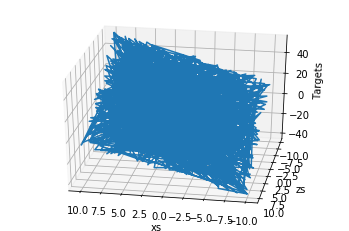

In [7]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This method actually shows the plot. 
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(observations,1)

Creating the Algorithm

In [10]:
init_range = 0.1

In [12]:
# We will initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# You can play around with the initial range, but we don't really encourage you to do so.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print (weights)
print (biases)

Set a learning Rate

In [13]:
learning_rate = 0.02

Train the mnodel
this consists of the following steps
- calculate the outputs
- calculate the loss function using the L2-norm formula
- print the loss
- update the weights and the loss using the gradient descent method

In [16]:
# using an iterator
for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    # calculate the loss using the L2-norm formular
    loss = np.sum(deltas **2)/2/observations #average loss
    print(loss)
    # update the weight and the biases for the next iteration
    deltas_scaled = deltas/observations
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

240.36901229001919
36.98750440367012
14.407219709314683
11.541493227815147
10.840272573270166
10.390416107718936
9.982753951819923
9.593887540432231
9.22070159806544
8.862316530316072
8.51811825825309
8.187542228773257
7.870048992849629
7.5651207533787685
7.272260238699848
6.990989860658962
6.720850932356337
6.461402919756101
6.212222723235252
5.972903987601462
5.743056439421349
5.522305250574802
5.310290426997151
5.1066662216121905
4.91110057049879
4.723274551371529
4.542881863492322
4.369628328164842
4.203231408997195
4.043419751150508
3.8899327388220217
3.7425200702410786
3.600941349484902
3.464965694448511
3.3343713603294938
3.208945378013578
3.0884832067713286
2.97278840069959
2.861672288363717
2.7549536651181543
2.6524584976036247
2.5540196399390322
2.4594765611452303
2.36867508335618
2.2814671303905536
2.197710486273777
2.117268563316711
2.040010179372762
1.9658093439101856
1.894545052550701
1.826101089739383
1.760365839223995
1.6972321020347436
1.636596921667577
1.5783614161859

In [18]:
print(weights, biases)

[[ 2.00454435]
 [-3.00164769]] [4.32441533]


Plot the output with the target

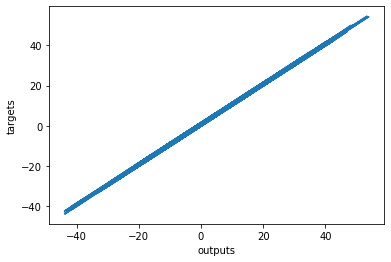

In [19]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()